In [1]:
import pickle
import pprint as pp
from pymatgen.analysis.local_env import BrunnerNN_real, CovalentBondNN, Critic2NN, CrystalNN, VoronoiNN
from pymatgen.entries.compatibility import Compatibility
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.periodic_table import Element
from gaspy.mongo import make_atoms_from_doc
from gaspy.atoms_operators import fingerprint_adslab, remove_adsorbate
#from pymatgen.analysis.chemenv.coordination_environments.coordination_geometries import CoordinationGeometry
from ase.io import read,write
from ase.visualize import view
import os
from tqdm import notebook
import numpy as np
import pymatgen as mg
from ase import Atoms
import ase
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Bad key savefig.frameon in file /home/ahrehd0506/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/ahrehd0506/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/ahrehd0506/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

In [2]:
with open('/home/ahrehd0506/research/GASpy/CO_docs_slab_added.pkl', 'rb') as p_f:
    CO_data = pickle.load(p_f)
with open('/home/ahrehd0506/research/GASpy/H_docs_slab_added.pkl', 'rb') as p_f:
    H_data = pickle.load(p_f)

In [59]:
len(H_data)

21317

In [33]:
CO_data[0]['movement_data'].keys()

dict_keys(['max_bare_slab_movement', 'max_slab_movement', 'max_adsorbate_movement'])

In [35]:
CO_energy = []
H_energy = []
for datum in CO_data:
    CO_energy.append(datum['energy'])
for datum in H_data:
    H_energy.append(datum['energy'])


slab_CO = []
adsorbate_CO =[]

for datum in CO_data:
    slab_CO.append(datum['movement_data']['max_slab_movement'])
    adsorbate_CO.append(datum['movement_data']['max_adsorbate_movement'])

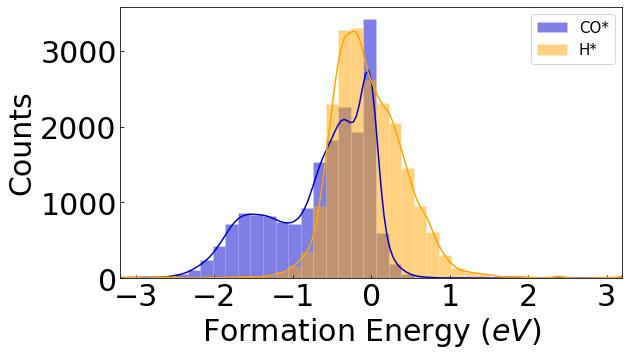

In [31]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
b=sns.histplot(CO_energy,bins=25,binrange=(-2.5,1.5),alpha=0.5,color='mediumblue',edgecolor=(1,1,1,.1),label='CO*',kde=True)
b=sns.histplot(H_energy,bins=25,binrange=(-2.5,1.5),alpha=0.5,color='orange',edgecolor=(1,1,1,.1),label='H*',kde=True)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
plt.xlim([-3.2,3.2])
plt.xticks([-3,-2,-1,0,1,2,3])
#plt.ylim([0,400])

ax.set_xlabel(r'Formation Energy ($eV$)',fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.tick_params(labelsize=30)
ax.legend(fontsize=15)
#plt.savefig('energy_histogram.svg')

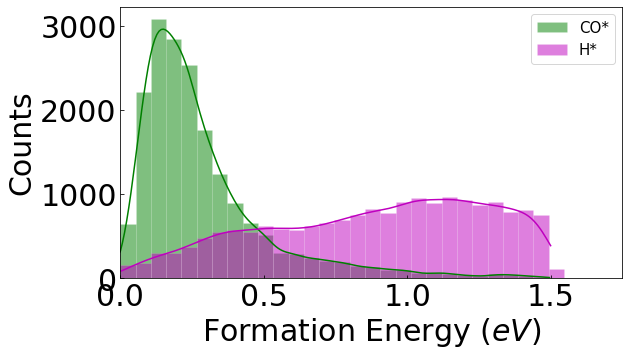

In [58]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
b=sns.histplot(slab_CO,bins=30,binrange=(0,1.6),alpha=0.5,color='green',edgecolor=(1,1,1,.1),label='CO*',kde=True)
b=sns.histplot(adsorbate_CO,bins=30,binrange=(0,1.6),alpha=0.5,color='m',edgecolor=(1,1,1,.1),label='H*',kde=True)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
plt.xlim([0,1.75])
#plt.xticks([-3,-2,-1,0,1,2,3])
#plt.ylim([0,400])

ax.set_xlabel(r'Formation Energy ($eV$)',fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.tick_params(labelsize=30)
ax.legend(fontsize=15)
#plt.savefig('movement_histogram.svg')